<a href="https://colab.research.google.com/github/pablocanas/minitarea3/blob/master/minitarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 3: Uso de Atropy y Pandas con bases de datos.

**Objetivos:**

1. Abrir y graficar de forma clara un archivo FITS.
2. Trabajar con Pandas para el manejo de una gran base de datos.
3. Conocer sobre los exoplanetas que se han descubierto.


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.


##Astropy y FITS

##1. Abrir un FITS con Astropy y sacar información de su header

La primera parte de esta minitarea consiste en descargar un nuevo archivo `FITS` desconocido. Usando lo que aprendimos en clases, debemos sacar información importante de su header.

Para comenzar, debes descargar el archivo `FITS`  dado y luego, abrirlo usando el módulo `fits` de  `Astropy` para guardalo en una variable llamada hdu:

In [0]:
import matplotlib.pyplot as plt
from astropy.io import fits 
from astropy.utils.data import download_file
import numpy as np

archivo = download_file("https://github.com/astrodatos/Clase3/raw/master/lsc1m005-kb69-20160621-0111-e91.fits.fz", cache=True )
hdu = fits.open(archivo) #abrimos el archivo descargado y se guarda en hdu


Como comentamos en clases, no existe un estandar universal sobre los header provenientes de distintos telescopios. **En este caso particular, la información del fit no vive en `hdu[0]`, sino que en `hdu[1]`.**

In [4]:
print(hdu.info())

Filename: /root/.astropy/cache/download/py3/a01c803c4997037bcc23c9d47d4803ac
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 CompImageHDU    264   (2028, 2028)   float32   
  2  CAT           1 BinTableHDU     59   51R x 24C   [D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D]   
  3  BPM           1 CompImageHDU     10   (2028, 2028)   uint8   
None


Ahora, debes inspeccionar el header. Llámalo (sin un print, porque sale hacia el lado) para ver que forma tiene el diccionario: sus llaves (keys) y valores asignados. 

In [5]:
# Invocar el header
header_data = hdu[1].header
header_data

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2028 / width of table in bytes                        
NAXIS2  =                 2028 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
EXTNAME = 'SCI     '                                                            
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'lsc     '        

Debes identificar las llaves que contengan información acerca de: 
1. objeto astronómico que se observó.
2. qué filtro se usó.
3. la fecha de la observación.
4. desde qué observatorio. 

Para completar los siguientes print,  primero debes crear una variable para cada uno de los datos que necesitamos y guardar la información directamente desde el header, habiendo ya identificado el `key` del diccionario donde vive cada información.

In [0]:
# Crea 4 variables para guardar la información del header requerida. Recuerda que no sirve leer a ojo el valor y escribirlo.
# Debe ser asignado usando los beneficios de ser un array, de la forma genérica: header["key"]
observatorio = header_data["SITE"]
fecha_observacion = header_data["DAY-OBS"]
filtro = header_data["FILTER1"]
objeto = header_data["OBJECT"]




In [7]:
print("Se observó el siguiente objeto astronómico:",objeto)
print("Se utilizó el filtro:",filtro)
print("La fecha es:",fecha_observacion)
print("Se observó desde el observatorio:",observatorio)

Se observó el siguiente objeto astronómico: M84
Se utilizó el filtro: air
La fecha es: 20160621
Se observó desde el observatorio: LCOGT node at Cerro Tololo Inter-American Observatory


##2. Mostrar la imagen con imshow

La segunda parte de esta actividad consiste en mostrar la imagen con imshow y modificarla para que se vea más bonita. 

Primero, debes asignar en la variable `imagen` la compenente del header que contiene la matriz que forma la imagen astronómica. Recuerda que en este fits específico, el header y la imagen viven en `hdu[1]`.

In [0]:
imagen = hdu[1].data

Vamos a importar un módulo de `matplotlib` que nos permitirá cambiar la escala de colores de la imagen, como por ejemplo, a una logaritmica. 

Ahora, debes completar el siguiente bloque de código para mostrar la imagen que viene en este fit.

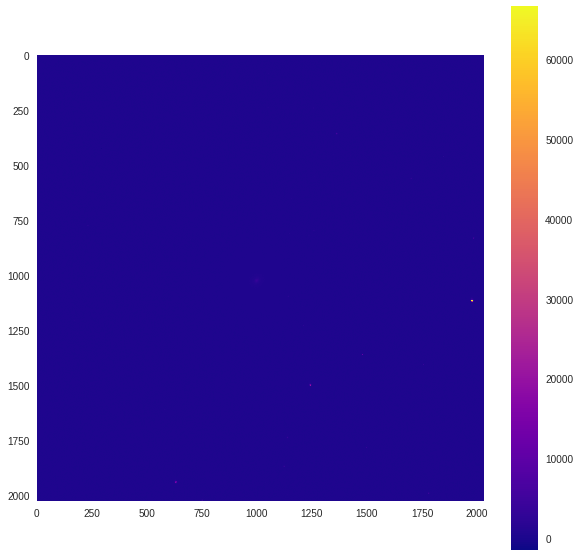

In [9]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,10))
plt.imshow(imagen, cmap='plasma')
plt.colorbar()

# El siguiente comando hará que no se vean las líneas sobre la imagen
plt.grid(b=None)

Se supone que en esta imagen deberíamos ver una galaxia en el centro, sin embargo, casi no se ve nada. Esto ocurre cuando la escala de colores no es la correcta. Para utilizar una escala logarítmica por ejemplo, debes agregar el siguiente argumento a la función imshow(): `norm = LogNorm()`.

Plotea nuevamente el gráfico, pero ahora con la escala logarítmica.

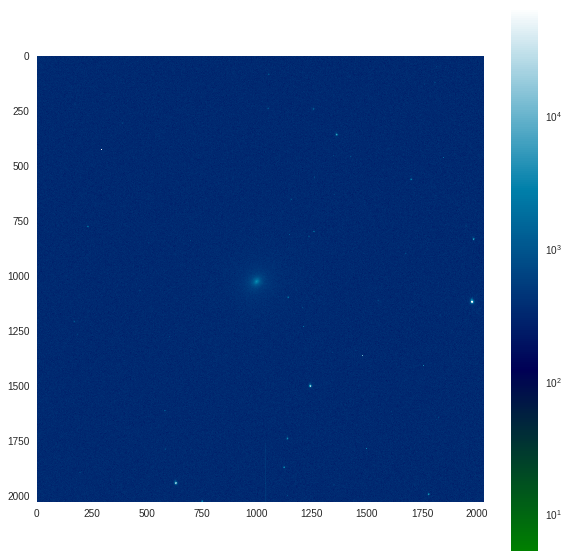

In [10]:
# Plot acá
plt.figure(figsize=(10,10))
plt.imshow(imagen, cmap='ocean',norm=LogNorm())
plt.colorbar()

# El siguiente comando hará que no se vean las líneas sobre la imagen
plt.grid(b=None)


Ahora se observa una pequeña zona más brillante en el centro: es una galaxia! Sin embargo, nos gustaría verla más de cerca. Como la imagen es una matriz de valores, lo que debes hacer a continuación es un slicing de los datos para seleccionar un cuadrado.

**HINT** El slicing en una matriz de hace de la forma `array[inicio_fila:fin_fila,inicio_columna:fin_columna]`. Si necesitan más ayuda, google es su mejor amigo :)

Luego de tener el cuadrado que contiene la imagen, debes plotearla con escala logarítmica de colores.

(2028, 2028)
(150, 200)


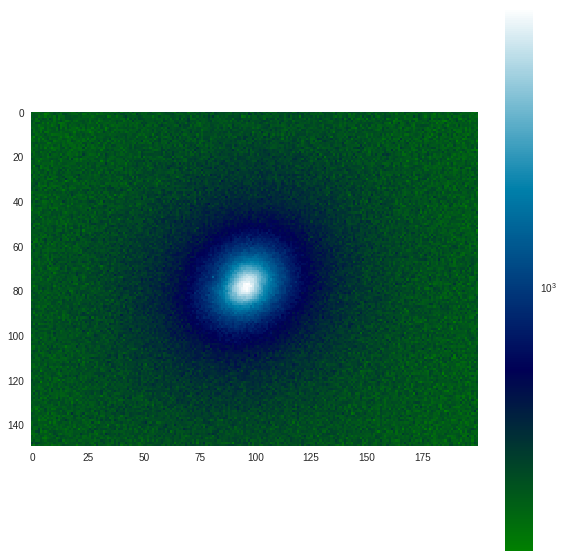

In [11]:
# Slicing del cuadrado con la galaxia y plot acá
print(imagen.shape)
nueva_imagen = imagen[950:1100,900:1100]
print(nueva_imagen.shape)
plt.figure(figsize=(10,10))
plt.imshow(nueva_imagen, cmap='ocean',norm=LogNorm())
plt.colorbar()

# El siguiente comando hará que no se vean las líneas sobre la imagen
plt.grid(b=None)


##Pandas y bases de datos

##3. Graficando exoplanetas con Pandas

En la Clase 3 aprendimos que la librería `Pandas` es muy útil para trabajar con bases de datos. En esta sección, volveremos a trabajar con la base de datos de Exoplanetas, sacada de NASA Exoplanet Archive, la cual contiene más de 3900 exoplanetas confirmados con sus respectivos parámetros planetarios y estelares.

Para conocer las columnas que contiene esta base de datos, pueden abrir el archivo en sus computadores y analizar las primeras líneas que empiezan con #, o también llamar al método `.columns` de un Data Frame.

**HINT** Las columnas más importantes/útiles del archivo planets.csv con su respectiva descripción y unidades, son:
- pl_hostname:    Host Name
- pl_name:        Planet Name
- pl_discmethod:  Discovery Method
- pl_pnum:        Number of Planets in System
- pl_orbper:      Orbital Period [days]
- pl_orbsmax:     Orbit Semi-Major Axis [AU])
- pl_orbeccen:    Eccentricity
- pl_orbincl:     Inclination [deg]
- pl_bmassj:      Planet Mass or M*sin(i) [Jupiter mass]
- pl_radj:        Planet Radius [Jupiter radii]
- ra_str:         RA [sexagesimal]
- ra:             RA [decimal degrees]
- dec_str:        Dec [sexagesimal]
- dec:            Dec [decimal degrees]
- st_dist:        Distance [pc]
- pl_eqt:         Equilibrium Temperature [K]
- pl_massj:       Planet Mass [Jupiter mass]
- pl_masse:       Planet Mass [Earth mass]
- pl_rade:        Planet Radius [Earth radii]
- pl_disc:        Year of Discovery


En esta sección se pide graficar ***de forma clara***, todos los exoplanetas en Masa vs Período, donde el color represente su método de detección. Sugerimos usar máscaras de array para separar los planetas según su método de detección en distintos Data Frame, para luego graficarlos. Recuerden agregar leyendas en el plot donde se explique que significan los colores.


(9,)
(9,)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5, 1.0, 'Relacion masa vs periodo y metodo de descubrimiento')

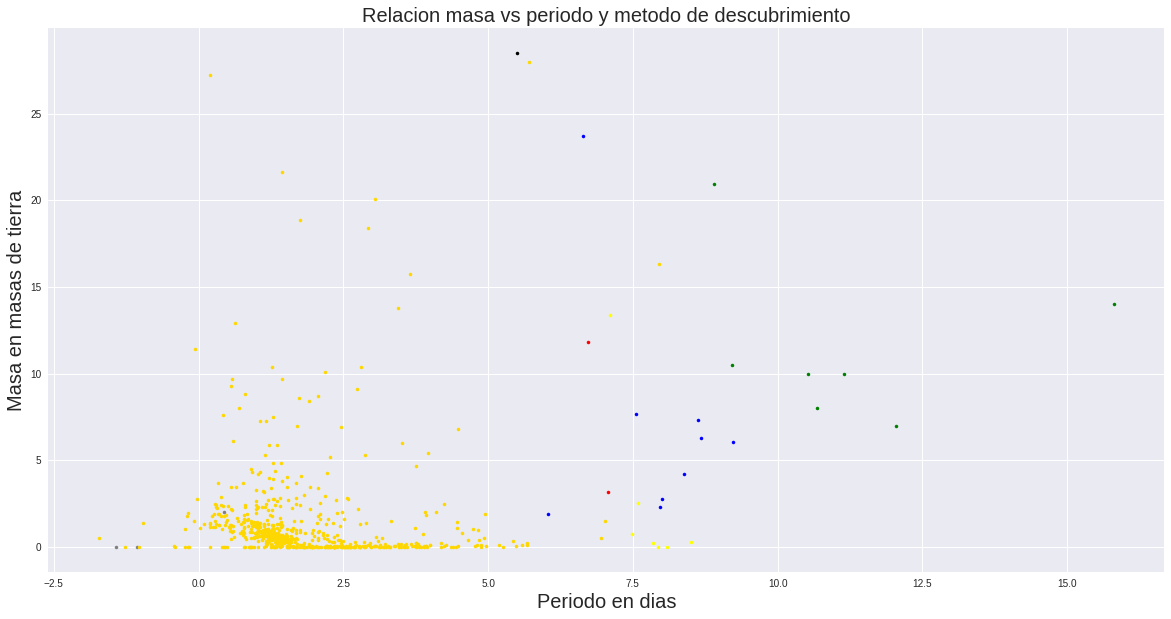

In [16]:
# Importamos Pandas y cargamos el archivo planets.csv
import pandas as pd
archivo = download_file('https://raw.githubusercontent.com/piacortes/astroclases/master/planets.csv?token=AXWBlnRlbOADXAfY-qtBxFJQ3SugzCucks5cpBbnwA%3D%3D')
planetas = pd.read_csv(archivo, comment="#")
masas = planetas["pl_bmassj"]
periodo = planetas["pl_orbper"]
metodo_det = planetas["pl_discmethod"]
astro_det = planetas[planetas["pl_discmethod"]=="Astrometry"]
eclipse_det = planetas[planetas["pl_discmethod"]=="Eclipse Timing Variations"]
imag_det = planetas[planetas["pl_discmethod"]=="Imaging"]
mic_det = planetas[planetas["pl_discmethod"]=="Microlensing"]
orbt_det = planetas[planetas["pl_discmethod"]=="Orbital Brightness Modulation"]
puls_det = planetas[planetas["pl_discmethod"]=="Pulsar Timing "]
puls2_det = planetas[planetas["pl_discmethod"]=="Pulsation Timing Variations"]
rad_det = planetas[planetas["pl_discmethod"]=="Radial Velocity "]
trans_det = planetas[planetas["pl_discmethod"]=="Transit"]
trans2_det = planetas[planetas["pl_discmethod"]=="Transit Timing Variations"]
print(eclipse_det["pl_orbper"].shape)
print(eclipse_det["pl_bmassj"].shape)


plt.figure(figsize=(20,10))
plt.xlabel("Periodo en dias",fontsize = 20)
plt.ylabel("Masa en masas de tierra",fontsize = 20)
plt.plot(np.log(astro_det["pl_orbper"]),astro_det["pl_bmassj"], ".", color="black", c=metodo_det)
plt.plot(np.log(eclipse_det["pl_orbper"]),eclipse_det["pl_bmassj"], ".", color="blue", c=metodo_det)
plt.plot(np.log(imag_det["pl_orbper"]),imag_det["pl_bmassj"], ".", color="green", c=metodo_det)
plt.plot(np.log(mic_det["pl_orbper"]),mic_det["pl_bmassj"], ".", color="yellow", c=metodo_det)
plt.plot(np.log(orbt_det["pl_orbper"]),orbt_det["pl_bmassj"], ".", color="grey", c=metodo_det)
plt.plot(np.log(puls_det["pl_orbper"]),puls_det["pl_bmassj"], ".", color="brown", c=metodo_det)
plt.plot(np.log(puls2_det["pl_orbper"]),puls2_det["pl_bmassj"], ".", color="red", c=metodo_det)
plt.plot(np.log(rad_det["pl_orbper"]),rad_det["pl_bmassj"], ".", color="orange", c=metodo_det)
plt.plot(np.log(trans_det["pl_orbper"]),trans_det["pl_bmassj"], ".", color="gold", c=metodo_det)
plt.title("Relacion masa vs periodo y metodo de descubrimiento",fontsize=20)




# Graficar plot


##4. ¿Cuántos exoplanetas se han descubierto por año?

Realiza un histograma que muestre cuántos exoplanetas se han descubierto por año.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'año')

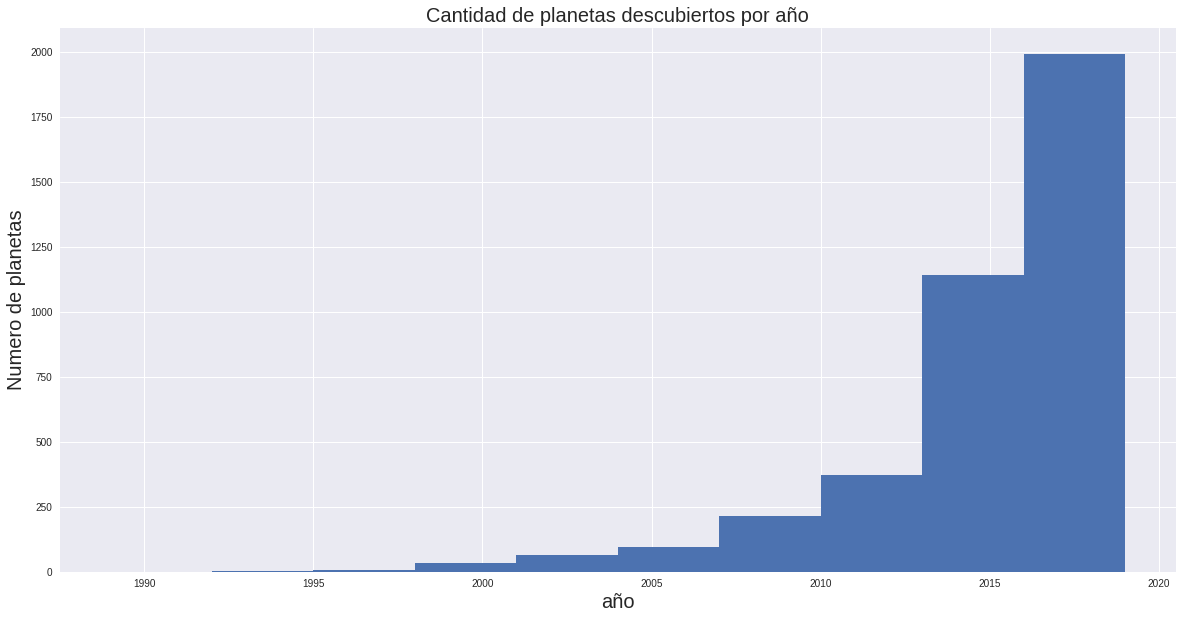

In [14]:
# Hacer histograma

disc_year = planetas["pl_disc"]
plt.figure(figsize=(20,10))
plt.hist(disc_year) #Se graficarán la distribucion de datos mediante un histograma
plt.title("Cantidad de planetas descubiertos por año",fontsize = 20)
plt.ylabel("Numero de planetas",fontsize = 20)
plt.xlabel("año", fontsize = 20)


##5. Conocer los planetas más extremos descubiertos

Les pedimos usar sus conocimientos pythonísticos, para printear la información (que ustedes consideren relevante) de los exoplanetas que cumplan con las siguientes características:
- El más lejano a la Tierra.
- El más cercano a la Tierra.
- El más grande.
- El más pequeño.

In [0]:
# Trabajen
pl_lejano = planetas["st_dist"].idxmax()
pl_cercano = planetas["st_dist"].idxmin()
pl_gigante = planetas["pl_radj"].idxmax()
pl_pequeño = planetas["pl_radj"].idxmin()
def datos_planetas(indice_planeta):
  print("El nombre del planeta es",planetas["pl_name"][indice_planeta])
  print("Se encuentra en la estrella",planetas["pl_hostname"][indice_planeta],"a una distancia de",planetas["st_dist"][indice_planeta],"parsecs \n" "y en su sistema convive con",planetas["pl_pnum"][indice_planeta],"planetas")
  print("Su masa es de",planetas["pl_masse"][indice_planeta],"masas de la tierra")
  print("El radio del planeta es de",planetas["pl_masse"][indice_planeta],"veces el radio de la tierra")
  print("El periodo orbital es de",planetas["pl_orbper"][indice_planeta],"dias")
  return
print("Datos del planeta más lejano")
datos_planetas(pl_lejano)
print("Datos del planeta más cercano")
datos_planetas(pl_cercano)
print("Datos del planeta más grande")
datos_planetas(pl_gigante)
print("Datos del planeta más pequeño")
datos_planetas(pl_pequeño)
  
  

  
  



Datos del planeta más lejano
El nombre del planeta es SWEEPS-11 b
Se encuentra en la estrella SWEEPS-11 a una distancia de 8500.0 parsecs 
y en su sistema convive con 1 planetas
Su masa es de 3082.82 masas de la tierra
El radio del planeta es de 3082.82 veces el radio de la tierra
El periodo orbital es de 1.796 dias
Datos del planeta más cercano
El nombre del planeta es Proxima Cen b
Se encuentra en la estrella Proxima Cen a una distancia de 1.29 parsecs 
y en su sistema convive con 1 planetas
Su masa es de nan masas de la tierra
El radio del planeta es de nan veces el radio de la tierra
El periodo orbital es de 11.186 dias
Datos del planeta más grande
El nombre del planeta es HD 100546 b
Se encuentra en la estrella HD 100546 a una distancia de 97.0 parsecs 
y en su sistema convive con 1 planetas
Su masa es de nan masas de la tierra
El radio del planeta es de nan veces el radio de la tierra
El periodo orbital es de nan dias
Datos del planeta más pequeño
El nombre del planeta es Kepler-

##6. Los 5 exoplanetas más parecidos a la Tierra

Ahora, deben ponerse creativos para contarnos cuáles son los 5 exoplanetas descubiertos más parecidos a la Tierra, y sus características. 

**Importante:** Queda a su criterio (o descriterio) como definirán la similitud a la Tierra.

In [0]:
# Trabajen
#Haremos una serie de Maskings hasta encontrar los mas parecidos
pl_similares = planetas[planetas["pl_rade"]<1.03]
pl_similares = pl_similares[pl_similares["pl_rade"]>0.9]
pl_similares = pl_similares[pl_similares["pl_masse"]<1.5]
print("Más similar a la tierra respectivo al radio y la masa es")
a =pl_similares.index #no se por que no me tira el numero del indice
print(a)
datos_planetas(pl_similares.index)
pl_similares = planetas[planetas["pl_rade"]<1.03]






Más similar a la tierra respectivo al radio y la masa es
Int64Index([3700], dtype='int64')
El nombre del planeta es 3700    TRAPPIST-1 e
Name: pl_name, dtype: object
Se encuentra en la estrella 3700    TRAPPIST-1
Name: pl_hostname, dtype: object a una distancia de 3700    12.1
Name: st_dist, dtype: float64 parsecs 
y en su sistema convive con 3700    7
Name: pl_pnum, dtype: int64 planetas
Su masa es de 3700    0.62
Name: pl_masse, dtype: float64 masas de la tierra
El radio del planeta es de 3700    0.62
Name: pl_masse, dtype: float64 veces el radio de la tierra
El periodo orbital es de 3700    6.099615
Name: pl_orbper, dtype: float64 dias
